# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

#Set some global plot defaults
sns.set(rc={"figure.figsize": (15, 8), 'legend.fontsize': 18}) # figsize and leg fontsize of seaborn plots
plt.rc('axes',   titlesize=18)                                  # fontsize of the x and y titles
plt.rc('axes',   labelsize=18)                                  # fontsize of the x and y labels
plt.rc('xtick',  labelsize=18)                                  # fontsize of the tick labels
plt.rc('ytick',  labelsize=18)                                  # fontsize of the tick labels
plt.rc('figure', titlesize=18)                                  # fontsize of the figure title

#We like reproducibility
np.random.seed(42)

df = pd.read_csv('data/human_body_temperature.csv')

-----------------

## My work and solutions

So this excercise has us take a look at temperature and heart rate data for humans. When dealing with any new dataset, we should take a quick look at to get a feel for the data. So let's do that first and worry about the questions second. The dataset is already loaded, so let's get started!

In [61]:
print(df.sample(5))
df.describe()

     temperature gender  heart_rate
55          98.6      F        82.0
40          98.4      F        79.0
19          99.4      M        70.0
31          97.6      F        61.0
115         98.0      M        64.0


,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Sampling some rows and getting descriptive statistics is a nice first look. It helps us understand the data a little better. Since there are only three columns, we can learn a little more about all three pretty quickly. We can start with both numeric columns and make a histogram for each. Note our choice for bin size takes the floor of the square root of the dataset size. In this case it would be floor( $\sqrt{130}$ ) = 11 bins.

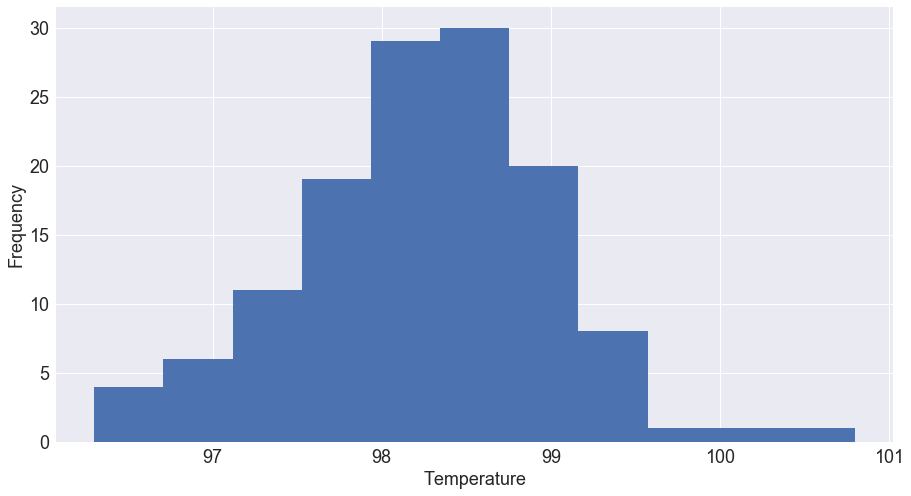

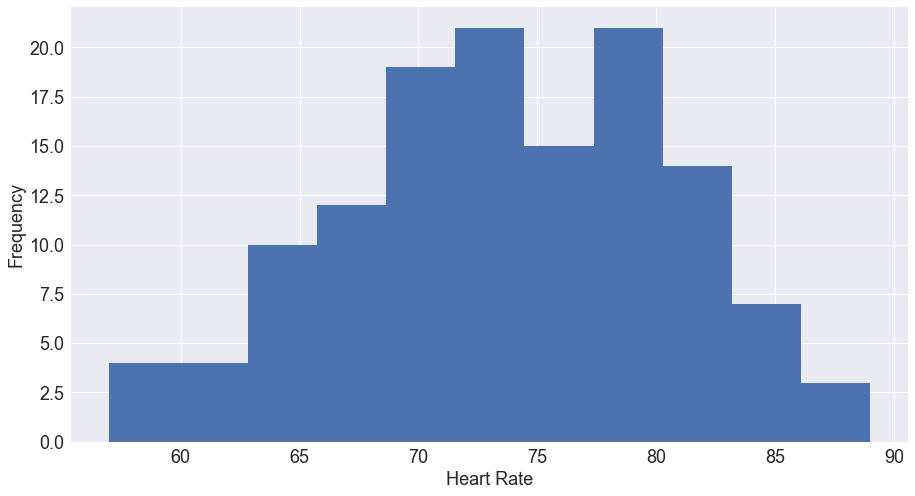

In [62]:
df.temperature.hist(bins=int(np.sqrt(len(df))))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

df.heart_rate.hist(bins=int(np.sqrt(len(df))))
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

There is nothing too shocking in either histogram, like say a spike in an unexpected region. We can also make a small table to count the number of each gender group. 

In [63]:
df.groupby('gender').size()

gender
F    65
M    65
dtype: int64

This result means the 130 person dataset is evenly divided into male and female subsets. This is good to know. Now, let's get to the questions..

### Question 1: Is the distribution of body temperatures normal? 

There are a couple different considerations to make. We can perform a normal test and look for a small p-value. Another option is to consider a graphical solution. A histogram was already made and it does seem to look somewhat normal, though it seems to be unbalanced to the left of the peak. However, we can check quickly by comparing CDFs and see if the sample distribution follows the theoretical normal CDF. Let's do both--it can help contextualize each method.

First, we can do normal test from the scipy library. 

In [64]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The p-value is about 0.25, which means this test does not reject the null hypothesis that this sample data is normally distributed. So we should be able to safely say the body temperature is normally distributed.

Now let's use the graphical method. 

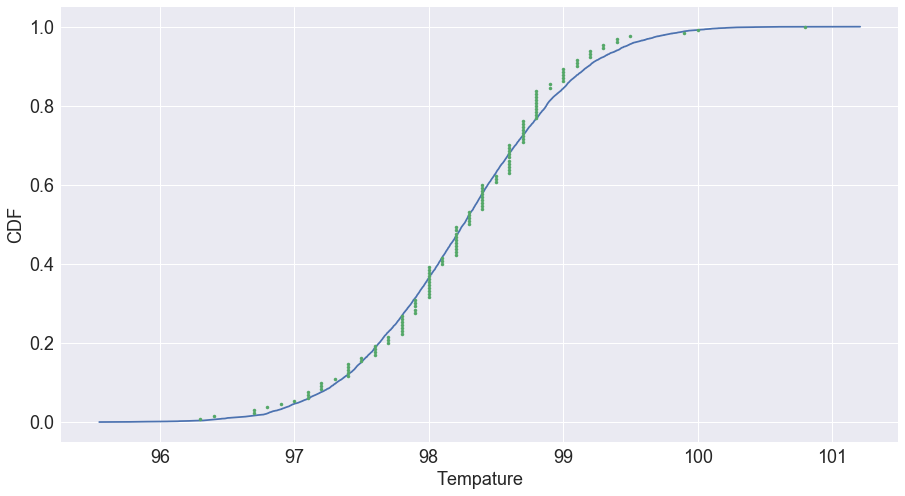

In [65]:
#First define a CDF function to calculate the CDF of an array
def cdf(data):
    """Generate CDF for 1D array"""
    x = np.sort(data)
    y = np.arange(1.0, len(data)+1) / len(data)
    
    return x, y

#Get the sample mean/std
mean = np.mean(df.temperature)
std  = np.std(df.temperature)

# Sample the normal dist given our sample mean/std
normal = np.random.normal(mean, std, 10000)

# Get the CDF of the sample and theoretical distributions
x, y = cdf(df.temperature)
x_norm, y_norm = cdf(normal)

# Plot it all
plt.plot(x_norm, y_norm)
plt.plot(x, y, marker='.', ls='none')
plt.xlabel('Tempature')
plt.ylabel('CDF')
plt.show()

The sample CDF seems to follow its expected CDF relatively closely. This visual inspection combined with the normality test means it is definitely safe to say that the body temperature is normally distributed.

### Answer 1: Yes, the body temperature distribution is normal. 

### Question 2: Is the sample size large? Are the observations independent? 

Recall that there are 130 observations in this dataset. The usual threshold is 30 observations, so a sample size of 130 should be large enough. The observations should be independent if we assume they are all different people.

### Answer 2:  Yes, the sample size is large enough for CLT and the observations are independent.

### Question 3: Is the true population mean really 98.6 degrees F? 

-  Would you use a one-sample or two-sample test? Why?
-  In this situation, is it appropriate to use the *t* or *z* statistic?
-  Now try using the other test. How is the result be different? Why? 

Because we are testing a sample set of data against the population mean (a single value), we should use a one-sample test. Both statistics can work in this case since there is enough data and it is normally distributed. However, since the population variance is not known or given, its better to use a *t*-test over a *z*-test. 

Let's perform that *t*-test first. 

In [66]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The *t*-test gives a very small p-value and means there is a significant difference between the sample and (supposed) population mean. Given this result, the true population mean may indeed be incorrect. But we can also perform a *z*-test for more confirmation.

In [67]:
sm.stats.ztest(df.temperature, value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

We get similar results here. The *z*-test also rejects the null hypothesis that there is no difference between the supposed population mean and the sample mean. 

### Answer 3: The true population mean does not seem to be 98.6  deg F.

### Question 4: Draw a small sample of size 10 from the data and repeat both tests.

- Which one is the correct one to use?
- What do you notice? What does this tell you about the difference in application of the *t* and *z* statistic? 

We can sample 10 rows as we did at the beginning of the notebook. Because we are sampling 10 (which is less than 30), the *z*-test is not appropriate here. So the *t*-test is the better one to use. 

In [68]:
small_sample = df.sample(10, random_state=42)
small_sample

,temperature,gender,heart_rate
55,98.6,F,82.0
40,98.4,F,79.0
19,99.4,M,70.0
31,97.6,F,61.0
115,98.0,M,64.0
56,98.8,F,70.0
69,98.9,M,80.0
105,96.7,M,71.0
81,98.0,M,67.0
26,97.8,F,62.0


Now, we can do both tests, as the questions prompts us. 

In [69]:
print(stats.ttest_1samp(small_sample.temperature, 98.6))
print(sm.stats.ztest(small_sample.temperature, value=98.6))

Ttest_1sampResult(statistic=-1.5606191828511504, pvalue=0.15304624869561917)
(-1.5606191828511504, 0.11861362990253162)


We see that both tests give similar results and they are unable to reject that the (sub)sample mean is different from the population mean. In other words, there is no statistical difference between the (sub)sample mean and population mean. This result is the opposite of what we got earlier though. This is because of the rather small sample size which does not give us a large enough sample size. However, we can perhaps determine what that size might be. 

We can do the following. We can sample the data at various sizes (say steps of 10 between 10 and 130) and determine both *t-* and *z-*tests. At each sample size, we can repeat the measurements many, many times. This way we can get the average test statistic which should be relatively unbiased estimate. We can do this below and then plot the p-value as a function of (sub)sample size. A good check is for the values at x=130 are the same ones calculated in Question 3 above.

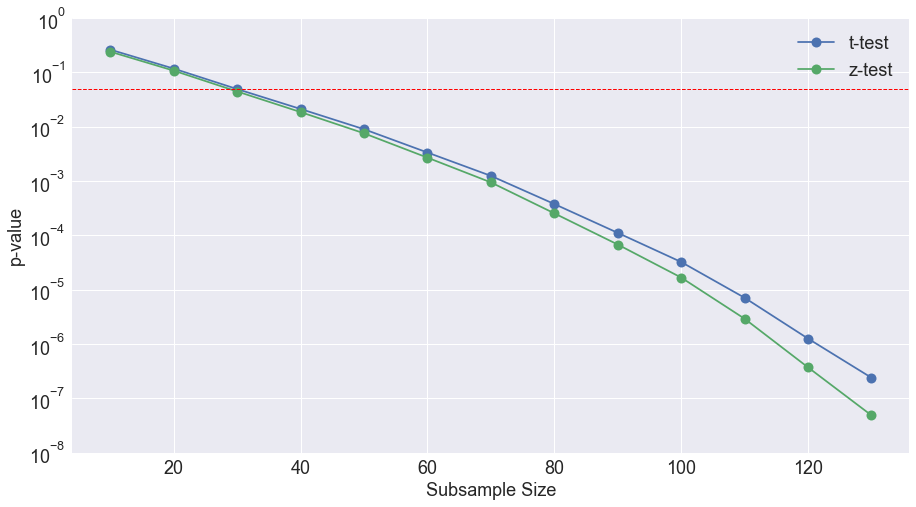

In [70]:
#Dataframe to hold results 
sample_results = pd.DataFrame(index=range(13),columns=['x','tp','zp'])

def subsample(data,n,size):
    '''Function for subsampling for the test statistics'''
    t_test, z_test = [], []
    for i in range(size):
        sample = data.sample(n,replace=False) #Sample w/out replacements
        ts, tp = stats.ttest_1samp(sample.temperature, 98.6)
        zs, zp = sm.stats.ztest(sample.temperature, value=98.6)
        t_test.append(tp)
        z_test.append(zp)
    return (np.mean(t_test), np.mean(z_test)) #Return the average test statistics

#Loop over the entire range of size of dataset, in steps of 10
for i in range(1,14):
    tp, zp = subsample(df, i*10, 1000)
    sample_results.x[i-1]  = i*10
    sample_results.tp[i-1] = tp
    sample_results.zp[i-1] = zp
    
#Plot the results including a line for alpha=0.05
plt.plot(sample_results.x, sample_results.tp, marker='.', ms=20, label='t-test')
plt.plot(sample_results.x, sample_results.zp, marker='.', ms=20, label='z-test')
plt.axhline(0.05, color='red', ls='--', lw=1.)
plt.xlabel('Subsample Size')
plt.ylabel('p-value')
plt.ylim(1e-8,1e0)
plt.legend()
plt.yscale('log')
plt.show()

We can see that it takes a sample size at or greater than 30 for the p-value of either test statistic to be at the $\alpha$ = 0.05 level (the dotted red line). This seems to make sense that value is the general rule of thumb for these types of calculations. It is also worth noting we do recover the original values at the subsample size of 130. 

### Answer 4: The tests cannot discern a difference between the smaller sample mean and population means. 

### Question 5: At what temperature should we consider someone's temperature to be "abnormal"?

- Start by computing the margin of error and confidence interval. 

This question is relatively straightforward. We can compute a prediction interval (standard 95%) and any temperature outside that range is extreme enough to be "abnormal." We can write a small function that calculates this info for us.

In [71]:
def calc_pi(data, alpha):
    '''Function to return sample mean and PI for given level'''
    mean = np.mean(data)
    std  = np.std(data)
    error = std * stats.norm.ppf(1 - (1-alpha)/2.)
    return (mean,error)

mean, error = calc_pi(df.temperature, 0.95)   
print('Sample mean is %f +/- %f.' % (mean, error))
print('The 95%% PI is %f to %f.' % (mean-error, mean+error))

normal = ((df.temperature>=(mean-error)) & (df.temperature<=(mean+error))).sum() * 100. / len(df)
print('Of the %i sample temperatures, %2.2f%% are within the interval.' % (len(df), normal) )

Sample mean is 98.249231 +/- 1.431475.
The 95% PI is 96.817756 to 99.680706.
Of the 130 sample temperatures, 93.85% are within the interval.


This calculation says that we 95% of the population lies between 96.82 and 99.68. Temperatures outside this range would be considered "abnormal." This is roughly confirmed as we calculate almost 94% of the samples inside this predicted range. 

### Question 6: Is there a significant difference between males and females in normal temperature?

- What test did you use and why?
- Write a story with your conclusion in the context of the original problem. 

The zeroth step of course is to create two new dataframes for each gender. 

In [72]:
male_df = df[df.gender.str.contains('M')]
female_df = df[df.gender.str.contains('F')]

Next, is to visually inspect the temperatures differences, if any. 

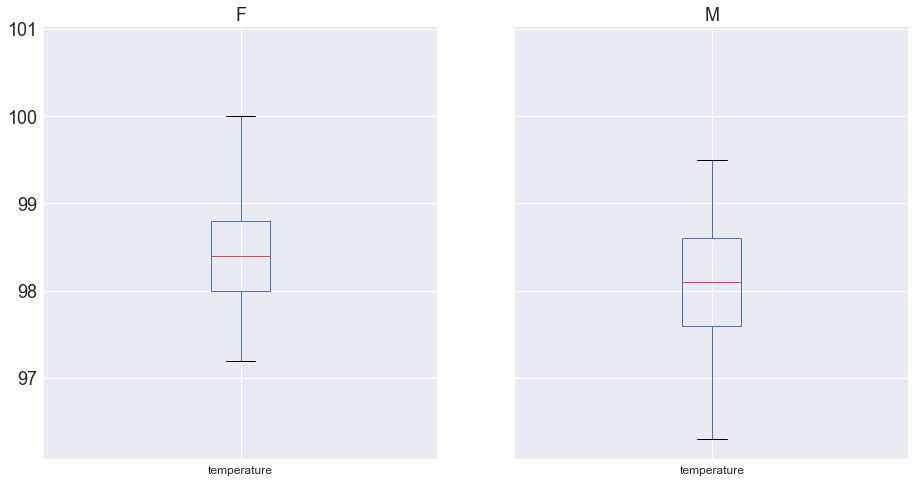

In [73]:
df[['gender', 'temperature']].groupby('gender').boxplot(return_type='axes')
plt.show()

There does seem to be a difference between the two but note immediately that the means for both genders are within the  IQR (interquartile range) of each other. This clues us to the fact that their respective means are not that far from each other. Of course, we can calculate some numbers to verify this suspicion. 

We can calculate a 2-sample *t*-test since we have two sample means we want to compare. 

In [74]:
stats.ttest_ind(male_df.temperature, female_df.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

The p-value of this test is relatively small at 2.4%. This means that the two sample means are statistically different. To see if this p-value is significant we can calculate the 95% CI for each sample. An overlap would suggest that the two sample means are not so different. We can repurpose the PI function we defined earlier for this exercise. 

In [75]:
def calc_ci(data, alpha):
    '''Function to return sample mean and CI for given level'''
    mean = np.mean(data)
    std  = np.std(data)
    std_error = std / np.sqrt(len(data))
    error = std_error * stats.norm.ppf(1 - (1-alpha)/2.)
    return (mean,error)

mean_m, error_m = calc_ci(male_df.temperature, 0.95)
print('Male  \t| Sample mean is %f +/- %f.' % (mean_m, error_m))
print('      \t| The 95%% CI is %f to %f.\n' % (mean_m-error_m, mean_m+error_m))

mean_f, error_f = calc_ci(female_df.temperature, 0.95)
print('Female\t| Sample mean is %f +/- %f.' % (mean_f, error_f))
print('      \t| The 95%% CI is %f to %f.' % (mean_f-error_f, mean_f+error_f))

Male  	| Sample mean is 98.104615 +/- 0.168558.
      	| The 95% CI is 97.936057 to 98.273174.

Female	| Sample mean is 98.393846 +/- 0.179349.
      	| The 95% CI is 98.214497 to 98.573195.


There does appear to be an overlap in the CI. Let's graph this so we can visualize this easier.

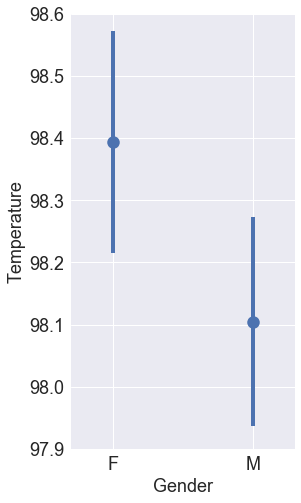

In [76]:
plt.figure(figsize=(4,8))
plt.errorbar(['F','M'], [mean_f, mean_m], [error_f, error_m], marker='.', ms=25, ls='None', lw=4)
plt.margins(0.3)
plt.xlabel('Gender')
plt.ylabel('Temperature')
plt.ylim(97.9,98.6)
plt.show()

While not large, there indeed is a small amount of overlap between the two sample means. So even though the p-value suggests there is only about a 2.4% chance the the difference in sample means is coincidental, the CI says that perhaps that chance is bigger. Because of this, I do not think I can reject the null hypothesis. In other words, there is not a significant statistical difference in mean temperature between male and female. 

Regardless of the difference between male and female, we can see how well they compare to the supposed population mean of 98.6. We see that the female mean is higher than male, so it might be a better comparison. We can do a *t*-test as before with each gender separately. 

In [77]:
print(stats.ttest_1samp(male_df.temperature, 98.6))
print(stats.ttest_1samp(female_df.temperature, 98.6))

Ttest_1sampResult(statistic=-5.7157574493186907, pvalue=3.083840317313081e-07)
Ttest_1sampResult(statistic=-2.2354980796784965, pvalue=0.028880450789682037)


Not too surpisingly, the male mean is different from the population mean, while the p-value for the female mean is not so small. It is in fact around 2.8% which is around the same level as the difference between male and female. So there might be some compatibilty between the accepted 98.6 mean with the female mean. Of course, to really find out, more iid data is needed to determine this for sure. 

### Answer 6: No, there is not a significant difference.

-----------------

Et fin.